In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Neighborhood Data

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
# Define variable to focus on features column from data set.
neighborhoods_data = newyork_data['features']

In [5]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [6]:
# Confirm dataframe columns.
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [7]:
# Loop through to populate dataframe.
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [8]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [9]:
# Confirm coverage of dataframe.
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


## Base Maps

### New York City

In [10]:
# Get coordinates for NYC.
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7308619, -73.9871558.


In [11]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### Queens

In [12]:
# Focus neighborhood data on Queens.
queens_data = neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop=True)
queens_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


In [13]:
# Get coordinates for Queens.
address = 'Queens, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Queens are 40.6524927, -73.7914214158161.


In [14]:
# create map of Queens using latitude and longitude values
map_queens = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(queens_data['Latitude'], queens_data['Longitude'], queens_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_queens)  
    
map_queens

### Bronx

In [15]:
# Focus neighborhood data on Bronx.
bronx_data = neighborhoods[neighborhoods['Borough'] == 'Bronx'].reset_index(drop=True)
bronx_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [16]:
# Get coordinates for Bronx.
address = 'Bronx, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bronx are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bronx are 40.85048545, -73.8404035580209.


In [17]:
# create map of Bronx using latitude and longitude values
map_bronx = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(bronx_data['Latitude'], bronx_data['Longitude'], bronx_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bronx)  
    
map_bronx

## Foursquare Venues

In [1]:
# Enter Foursquare credentials.
CLIENT_ID = 'REDACTED' # your Foursquare ID
CLIENT_SECRET = 'REDACTED' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: REDACTED
CLIENT_SECRET:REDACTED


### Flushing, Queens

In [19]:
# Focus neighborhood data on Flushing.
flushing_data = queens_data[queens_data['Neighborhood'] == 'Flushing'].reset_index(drop=True)
flushing_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Flushing,40.764454,-73.831773


In [20]:
# Define variables for Flushing's latitide and longitude.
flushing_latitude = flushing_data.loc[0, 'Latitude']
flushing_longitude = flushing_data.loc[0, 'Longitude']

In [21]:
# Create GET request for Flushing
LIMIT=100

RADIUS=2000

flushing_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    flushing_latitude, 
    flushing_longitude, 
    RADIUS, 
    LIMIT)
flushing_url

'https://api.foursquare.com/v2/venues/explore?&client_id=LX3HU4RCP2T4QQ2LL30FG2KE0UNR2POXXI5XVD0WALQL4QPJ&client_secret=KQZ5NERWGYF1P20FSNHZNN0ZQUXF41BLVA4QNI5OKAKOJ5Z2&v=20180605&ll=40.76445419697846,-73.83177300329582&radius=2000&limit=100'

In [22]:
# Send GET request for Flushing and display results.
flushing_results = requests.get(flushing_url).json()
flushing_results

{'meta': {'code': 200, 'requestId': '5c9a68756a6071534239a202'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Flushing',
  'headerFullLocation': 'Flushing, Queens',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 215,
  'suggestedBounds': {'ne': {'lat': 40.78245421497848,
    'lng': -73.80805184787874},
   'sw': {'lat': 40.746454178978446, 'lng': -73.8554941587129}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ae39cb6f964a520439721e3',
       'name': 'Debasaki',
       'location': {'address': '33-67 Farrington St',
        'lat': 40.764851521130126,
        'lng': -73.83176733519196,
        'labeledLatLngs': [{'label

In [23]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [24]:
# Clean json and structure it into a pandas dataframe.
flushtemp_venues = flushing_results['response']['groups'][0]['items']
    
flushing_venues = json_normalize(flushtemp_venues) # flatten JSON

# filter columns
flushing_filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
flushing_venues =flushing_venues.loc[:, flushing_filtered_columns]

# filter the category for each row
flushing_venues['venue.categories'] = flushing_venues.apply(get_category_type, axis=1)

# clean columns
flushing_venues.columns = [col.split(".")[-1] for col in flushing_venues.columns]

flushing_venues

,name,categories,lat,lng
0,Debasaki,Korean Restaurant,40.764852,-73.831767
1,Little Sheep Mongolian Hot Pot 小肥羊,Hotpot Restaurant,40.762083,-73.828963
2,Spring Shabu Shabu Buffet,Hotpot Restaurant,40.761083,-73.829609
3,Nan Xiang Xiao Long Bao,Dumpling Restaurant,40.759871,-73.832599
4,DunHuang Lanzhou Beef Noodle,Chinese Restaurant,40.762316,-73.827633
5,Joe’s Steam Rice Rolls,Cantonese Restaurant,40.759836,-73.829215
6,Joe's Shanghai 鹿鸣春,Dumpling Restaurant,40.761794,-73.830341
7,Fang Gourmet Tea,Tea Room,40.759342,-73.830955
8,Flushing Town Hall,Performing Arts Venue,40.763623,-73.830139
9,White Bear 白熊,Dumpling Restaurant,40.758729,-73.831755


In [25]:
print('{} Flushing, Queens venues were returned by Foursquare.'.format(flushing_venues.shape[0]))

100 Flushing, Queens venues were returned by Foursquare.


### Concourse, Bronx

In [26]:
# Focus neighborhood data on Concourse.
concourse_data = bronx_data[bronx_data['Neighborhood'] == 'Concourse'].reset_index(drop=True)
concourse_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Concourse,40.834284,-73.915589


In [27]:
# Define variables for Concourse's latitide and longitude.
concourse_latitude = concourse_data.loc[0, 'Latitude']
concourse_longitude = concourse_data.loc[0, 'Longitude']

In [28]:
# Create GET request for Concourse
LIMIT=100

RADIUS=2000

concourse_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    concourse_latitude, 
    concourse_longitude, 
    RADIUS, 
    LIMIT)
concourse_url

'https://api.foursquare.com/v2/venues/explore?&client_id=LX3HU4RCP2T4QQ2LL30FG2KE0UNR2POXXI5XVD0WALQL4QPJ&client_secret=KQZ5NERWGYF1P20FSNHZNN0ZQUXF41BLVA4QNI5OKAKOJ5Z2&v=20180605&ll=40.83428380733851,-73.91558941773444&radius=2000&limit=100'

In [29]:
# Send GET request for Concourse and display results.
concourse_results = requests.get(concourse_url).json()
concourse_results

{'meta': {'code': 200, 'requestId': '5c9a68764c1f672937d01845'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Concourse',
  'headerFullLocation': 'Concourse, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 194,
  'suggestedBounds': {'ne': {'lat': 40.852283825338525,
    'lng': -73.89184329502275},
   'sw': {'lat': 40.81628378933849, 'lng': -73.93933554044612}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4aac07c5f964a520bf5b20e3',
       'name': 'Bronx Museum of the Arts',
       'location': {'address': '1040 Grand Concourse',
        'crossStreet': 'at E 165th St.',
        'lat': 40.83130668787119,
        'l

In [30]:
# Function defined in Flushing section. 
# Clean json and structure it into a pandas dataframe.
contemp_venues = concourse_results['response']['groups'][0]['items']
    
concourse_venues = json_normalize(contemp_venues) # flatten JSON

# filter columns
concourse_filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
concourse_venues =concourse_venues.loc[:, concourse_filtered_columns]

# filter the category for each row
concourse_venues['venue.categories'] = concourse_venues.apply(get_category_type, axis=1)

# clean columns
concourse_venues.columns = [col.split(".")[-1] for col in concourse_venues.columns]

concourse_venues

,name,categories,lat,lng
0,Bronx Museum of the Arts,Art Museum,40.831307,-73.919949
1,Joyce Kilmer Park,Park,40.828850,-73.922367
2,El Gran Valle Restaurant,Spanish Restaurant,40.833308,-73.914290
3,Bleacher Creatures,Athletics & Sports,40.829309,-73.925509
4,Yankee Stadium,Baseball Stadium,40.829581,-73.926525
5,Delta SKY360° Suite,Lounge,40.829464,-73.926936
6,NYCFC @ Yankee Stadium,Soccer Field,40.829597,-73.926213
7,New York Yankees Museum,History Museum,40.829622,-73.926192
8,Bronx Drafthouse,Beer Bar,40.827998,-73.924677
9,SAP Suite,Baseball Stadium,40.829572,-73.926375


In [31]:
print('{} Concourse, Bronx venues were returned by Foursquare.'.format(concourse_venues.shape[0]))

100 Concourse, Bronx venues were returned by Foursquare.


### Citi Field, Flushing, Queens

In [32]:
# Focus neighborhood data on Citi Field.
citi_data = flushing_venues[flushing_venues['name'] == 'Citi Field'].reset_index(drop=True)
citi_data.head()

,name,categories,lat,lng
0,Citi Field,Baseball Stadium,40.756652,-73.845849


In [33]:
# Define variables for Citi Field's latitide and longitude.
citi_latitude = citi_data.loc[0, 'lat']
citi_longitude = citi_data.loc[0, 'lng']

In [34]:
# Create GET request for Citi Field.
LIMIT=100

RADIUS=1000

citi_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    citi_latitude, 
    citi_longitude, 
    RADIUS, 
    LIMIT)
citi_url

'https://api.foursquare.com/v2/venues/explore?&client_id=LX3HU4RCP2T4QQ2LL30FG2KE0UNR2POXXI5XVD0WALQL4QPJ&client_secret=KQZ5NERWGYF1P20FSNHZNN0ZQUXF41BLVA4QNI5OKAKOJ5Z2&v=20180605&ll=40.756652040193366,-73.84584908148173&radius=1000&limit=100'

In [35]:
# Send GET request for Citi Field and display results.
citi_results = requests.get(citi_url).json()
citi_results

{'meta': {'code': 200, 'requestId': '5c9a68774434b9612e70e0f7'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Flushing Meadows-Corona Park',
  'headerFullLocation': 'Flushing Meadows-Corona Park, Queens',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 93,
  'suggestedBounds': {'ne': {'lat': 40.76565204919338,
    'lng': -73.83398989586419},
   'sw': {'lat': 40.747652031193354, 'lng': -73.85770826709927}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '49d60947f964a520a85c1fe3',
       'name': 'Citi Field',
       'location': {'address': '12301 Roosevelt Ave',
        'crossStreet': 'at 126th St',
        'lat': 40.756652

In [36]:
# Function defined in Flushing section. 
# Clean json and structure it into a pandas dataframe.
cititemp_venues = citi_results['response']['groups'][0]['items']
    
citi_venues = json_normalize(cititemp_venues) # flatten JSON

# filter columns
citi_filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
citi_venues =citi_venues.loc[:, citi_filtered_columns]

# filter the category for each row
citi_venues['venue.categories'] = citi_venues.apply(get_category_type, axis=1)

# clean columns
citi_venues.columns = [col.split(".")[-1] for col in citi_venues.columns]

citi_venues.head()

,name,categories,lat,lng
0,Citi Field,Baseball Stadium,40.756652,-73.845849
1,Mikkeller Brewing NYC,Brewery,40.757007,-73.844354
2,Mets Clubhouse,Sporting Goods Shop,40.756892,-73.845792
3,Shea Bridge,Bridge,40.757096,-73.845779
4,Jackie Robinson Rotunda at Citi Field,Plaza,40.755501,-73.846272


In [37]:
print('{} venues near Citi Field were returned by Foursquare.'.format(citi_venues.shape[0]))

93 venues near Citi Field were returned by Foursquare.


In [39]:
# Get count of venues by category.
citi_cats = citi_venues.groupby('categories').count().reset_index(drop=False)
citi_cats.head()

,categories,name,lat,lng
0,American Restaurant,2,2,2
1,BBQ Joint,1,1,1
2,Bar,2,2,2
3,Baseball Field,1,1,1
4,Baseball Stadium,3,3,3


In [40]:
# Clean up dataframe.
citi_cats = citi_cats.rename(columns={'categories' : 'Category', 'name' : 'Mets'}).drop(['lat','lng'],axis=1)
citi_cats.head()

,Category,Mets
0,American Restaurant,2
1,BBQ Joint,1
2,Bar,2
3,Baseball Field,1
4,Baseball Stadium,3


### Yankee Stadium, Concourse, Bronx

In [41]:
# Focus neighborhood data on Yankee Stadium.
yank_data = concourse_venues[concourse_venues['name'] == 'Yankee Stadium'].reset_index(drop=True)
yank_data.head()

,name,categories,lat,lng
0,Yankee Stadium,Baseball Stadium,40.829581,-73.926525


In [42]:
# DP0701EN-3-3-2-Neigh...

In [43]:
# Define variables for Yankee Stadium's latitide and longitude.
yank_latitude = yank_data.loc[0, 'lat']
yank_longitude = yank_data.loc[0, 'lng']

In [44]:
# Create GET request for Yankee Stadium.
LIMIT=100

RADIUS=1000

yank_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    yank_latitude, 
    yank_longitude, 
    RADIUS, 
    LIMIT)
yank_url

'https://api.foursquare.com/v2/venues/explore?&client_id=LX3HU4RCP2T4QQ2LL30FG2KE0UNR2POXXI5XVD0WALQL4QPJ&client_secret=KQZ5NERWGYF1P20FSNHZNN0ZQUXF41BLVA4QNI5OKAKOJ5Z2&v=20180605&ll=40.82958123696525,-73.92652485519648&radius=1000&limit=100'

In [45]:
# Send GET request for Yankee Stadium and display results.
yank_results = requests.get(yank_url).json()
yank_results

{'meta': {'code': 200, 'requestId': '5c9a69366a607153481b9495'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Concourse Village',
  'headerFullLocation': 'Concourse Village, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 128,
  'suggestedBounds': {'ne': {'lat': 40.83858124596526,
    'lng': -73.91465263591232},
   'sw': {'lat': 40.820581227965235, 'lng': -73.93839707448063}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c9ff17103133704920477d5',
       'name': 'Delta SKY360° Suite',
       'location': {'address': 'Yankee Stadium',
        'crossStreet': 'Home Plate',
        'lat': 40.8294644221156,
        'l

In [46]:
# Function defined in Flushing section. 
# Clean json and structure it into a pandas dataframe.
yanktemp_venues = yank_results['response']['groups'][0]['items']
    
yank_venues = json_normalize(yanktemp_venues) # flatten JSON

# filter columns
yank_filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
yank_venues =yank_venues.loc[:, yank_filtered_columns]

# filter the category for each row
yank_venues['venue.categories'] = yank_venues.apply(get_category_type, axis=1)

# clean columns
yank_venues.columns = [col.split(".")[-1] for col in yank_venues.columns]

yank_venues.head()

,name,categories,lat,lng
0,Delta SKY360° Suite,Lounge,40.829464,-73.926936
1,Bleacher Creatures,Athletics & Sports,40.829309,-73.925509
2,Yankee Stadium,Baseball Stadium,40.829581,-73.926525
3,NYCFC @ Yankee Stadium,Soccer Field,40.829597,-73.926213
4,New York Yankees Museum,History Museum,40.829622,-73.926192


In [47]:
print('{} venues near Yankee Stadium were returned by Foursquare.'.format(yank_venues.shape[0]))

100 venues near Yankee Stadium were returned by Foursquare.


In [48]:
# Get count of venues by category.
yank_cats = yank_venues.groupby('categories').count().reset_index(drop=False)
yank_cats.head()

,categories,name,lat,lng
0,American Restaurant,2,2,2
1,Art Museum,1,1,1
2,Arts & Crafts Store,2,2,2
3,Athletics & Sports,1,1,1
4,BBQ Joint,1,1,1


In [49]:
# Clean up dataframe.
yank_cats = yank_cats.rename(columns={'categories' : 'Category', 'name' : 'Yankees'}).drop(['lat','lng'],axis=1)
yank_cats.head()

,Category,Yankees
0,American Restaurant,2
1,Art Museum,1
2,Arts & Crafts Store,2
3,Athletics & Sports,1
4,BBQ Joint,1


### Combination

In [50]:
# Combine neighborhood dataframes.
park_data = pd.concat([flushing_data, concourse_data])
park_data

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Flushing,40.764454,-73.831773
0,Bronx,Concourse,40.834284,-73.915589


In [51]:
# create map of both neighborhoods using latitude and longitude values
map_park = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(park_data['Latitude'], park_data['Longitude'], park_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_park)  
    
map_park

In [52]:
# Join venue dataframes.
park_cats = pd.merge(citi_cats, yank_cats, on='Category', how='outer')
park_cats.head()

,Category,Mets,Yankees
0,American Restaurant,2.0,2.0
1,BBQ Joint,1.0,1.0
2,Bar,2.0,1.0
3,Baseball Field,1.0,2.0
4,Baseball Stadium,3.0,4.0


In [56]:
park_cats.set_index('Category', inplace=True)
park_cats.head()

,Mets,Yankees
Category,,
American Restaurant,2.0,2.0
BBQ Joint,1.0,1.0
Bar,2.0,1.0
Baseball Field,1.0,2.0
Baseball Stadium,3.0,4.0


In [61]:
park_cats.sort_values(by=['Category'], inplace=True)
park_cats.head()

,Mets,Yankees
Category,,
American Restaurant,2.0,2.0
Art Museum,NaN,1.0
Arts & Crafts Store,NaN,2.0
Athletics & Sports,NaN,1.0
BBQ Joint,1.0,1.0


In [53]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.3


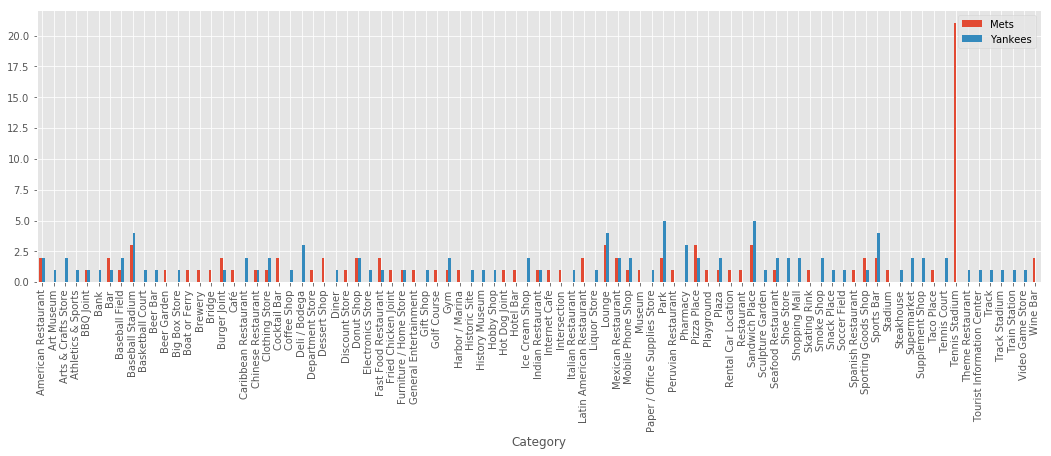

In [65]:
# Create bar chart.
park_cats.plot(kind='bar', figsize=(18, 5))

plt.show()